In [1]:
from figures import *

import matplotlib.ticker as mticker

In [2]:
# Import and unpack colony-level data.
colony = 'EGTi'
colonyfilelist, (colonynum, Nlist), (dt, tlist, adata) = importcolonydata( colony )

# Sort out bad colonies.
# colonybad = [26, 31, 11]
colonybad = [3, 12, 15, 16, 23, 24, 28]

# Sort colonies and remove outliers.
colonynum = np.setdiff1d( np.argsort( Nlist ), colonybad, assume_unique=True )
Nlist = Nlist[colonynum]
adata = adata[colonynum]
print( 'Colony ID:', colonynum )

# Created sorted popultion list.
Nsort = 10**np.linspace( 1,3,100 )

Colony ID: [10 13 22 21 18 14  1  9 34  0 29  4 17 26 27 35  8 20 31 32 30  5  7 11  6 19 25  2 33]


In [3]:
# Create metric function list for iterating.
metriclist = (dominantperiod, peakvalleydifference)

In [4]:
# Compute metrics over the colony-level data.
n = 3
mdata = np.array( [metric( adata ) for metric in metriclist[:n]] )

# Perform scaling for each of the metric functions.
fitlist = [fitscalinglaw(Nlist, Nlist*mlist if i > 0 else mlist) for i, mlist in enumerate( mdata )]

# Print coefficients and outcomes.
for fit in fitlist:
    print( fit.params[1], fit.conf_int()[1] )

# Print bad colonies.
print( colonynum[mdata[0] > 800] )

-0.0475523425314969 [-0.185  0.09 ]
0.7644562320326685 [0.672 0.857]
[]


1.0 3.0
0.0 3.0


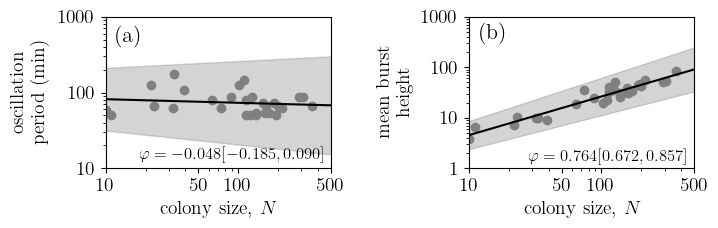

In [5]:
markerlist = ('(a)', '(b)', '(c)', '(d)', '(e)')
metriclabel = (
    'oscillation\nperiod (min)',
    'mean burst\nheight',
    'mean activity',
    'mean valley height',
    'peak height',
    )

# Plot the results of the fits.
fig, axs = plt.subplots( 1,len( mdata ), sharex=True )
axs = axs if len( mdata ) > 1 else [axs]

for i, a in enumerate( axs ):
    metric = metriclist[i]
    fit = fitlist[i]
    mlist = mdata[i]

    alpha, phi = fit.params
    alphadn, alphaup = fit.conf_int()[0]
    betadn, betaup = fit.conf_int()[1]

    ylist = Nlist*mlist if i > 0 else mlist
    ysort = np.exp( alpha )*Nsort**phi
    ydn = np.exp( alphadn )*Nsort**betadn
    yup = np.exp( alphaup )*Nsort**betaup

    a.scatter( Nlist, ylist, color='grey' )
    a.plot( Nsort, ysort, color='k' )
    a.fill_between( Nsort, ydn, yup, color='grey', alpha=1/3, zorder=0 )

    nmax = np.ceil(  np.max( np.log10( yup ) ) )
    nmin = np.floor( np.min( np.log10( ydn ) ) )
    print( nmin, nmax )

    a.text( 12, 0.75*10**nmax, markerlist[i],
        fontsize=16, va='top', ha='left' )
    a.text( 450, 10**nmin + 0.02*(10**(nmin+1) - 10**nmin),
        '$\\varphi = %.3f [%.3f, %.3f]$' % (phi, betadn, betaup),
        fontsize=12, va='bottom', ha='right' )

    a.set_ylim( [10**nmin, 10**nmax] )

    a.set_ylabel( metriclabel[i] )

    a.set_xscale( 'log' )
    a.set_yscale( 'log' )

xticks = [10, 50, 100, 500]
axs[-1].set_xlim( [min( xticks), max( xticks )] )
axs[-1].set_xticks( xticks, xticks )

for a in axs:
    a.set_xlabel( 'colony size, $N$' )
    a.xaxis.set_major_formatter( mticker.ScalarFormatter() )
    a.yaxis.set_major_formatter( mticker.ScalarFormatter() )
    a.yaxis.set_label_coords( -0.25, 0.5 )

fig.set_figwidth( 7.5 )
fig.set_figheight( 2.5 )
fig.tight_layout()

if 0:
    savefigure( fig, 'experiments/' + colony + '_activity_scaling' )